<h2 style="color:Dark Green" align="center"> MACHINE LEARNING PROJECT  </h2>
<h2 style="color:Dark Green" align="center"> HEART FAILURE PREDICTION </h2>
<h2 style="color:Dark Green" align="center"> Margaret Oluwadare (margaretoluwadareea@gmail.com) </h2>

#### Problem Statement
There is a need for early detection of heart failure in people with cardiovascular diseases or who are at high cardiovascular risk (due to the prsence of one or more risk factors such as hypertension, diabetes, hyperlipidameia or already established diseases). Early detection aids management in patients and to a large extent helps to prevent death.

#### Aim
- To predict whether a patient is prone to heart failure depending on multiple attributes.


#### Proposed methodology
The machine learning models we intend to use are:
- Logistic Regression
- Support Vector Machine (SVM)
- Decision Tree

**Data Information**
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

#### Import Libraries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']= (12,8)
sns.set_style('darkgrid')
sns.set_palette('hls')
from sklearn.model_selection import train_test_split

#%pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_auc_score

#### Read the CSV File

In [2]:
heart = pd.read_csv('heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Understanding the Dataset

In [3]:
#checking the shape of the dataset

heart.shape

(918, 12)

In [4]:
#information about the data set

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Data Cleaning and Preprocessing

In [5]:
#check for missing values

heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
#check for duplicates

duplicated = heart[heart.duplicated()]
print(f'Duplicate values are :{len(duplicated)}')

Duplicate values are :0


##### Insights:
- The dataset has 918 observations (rows) with 12 attributes (columns).
- There are no missing or duplicated values in the dataset.

#### Summary Statistics

In [7]:
#summary statistics of numerical columns

heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
#summary statistics of categorical columns

heart.describe(include=['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


##### Insights:
- The minimum age is 28 and the maximum age is 77.
- The miminum Resting Blood Pressure is 0. 
- The lowest maximum heart rate is 60, while the highest is 202.
- Men are more represented in the dataset.
- There are 4 unique chest pain type, and the most common chest pain type is the ASY(Asymptomatic).

#### Exploratory Data Analysis (EDA)

#### The EDA will be divided into 3 parts, namely;
1. EDA on numerical columns
2. EDA on categorical columns
3. EDA on the target variable(Heart Disease)

#### 1. EDA on Numerical Columns

In [9]:
#function to extract numerical columns from the dataset
numerical = []
for col in heart:
    if heart[col].dtype !='object':
        numerical.append(col)
        
#remove the target variable heart disease
numerical.remove('HeartDisease')

#print the numerical columns
print('The numerical columns are :', numerical)

The numerical columns are : ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


In [10]:
#checking the number of unique values in each of the numerical columns

holder = {}
for i in list(numerical):
    holder[i] = heart[i].value_counts().shape[0]

pd.DataFrame(holder, index=['Unique Values'])

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
Unique Values,50,67,222,2,119,53


#### AGE

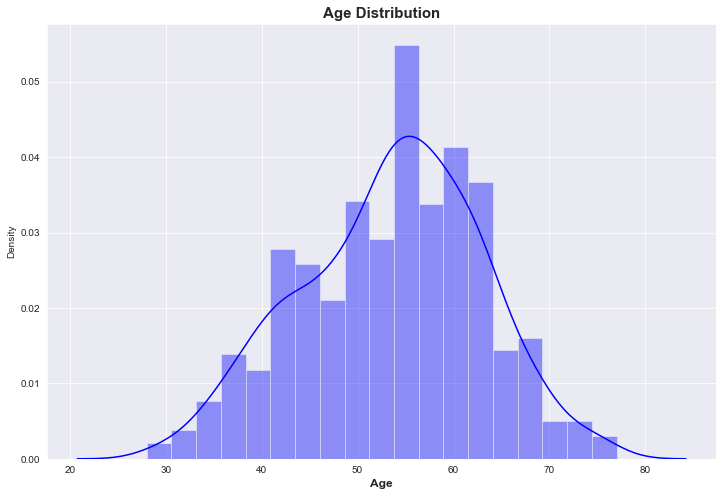

In [11]:
#distplot to check the distribution of ages in the dataset

sns.distplot(heart.Age, kde = True, color='blue')
plt.title('Age Distribution',fontweight='bold', fontsize=15)
plt.xlabel('Age',fontweight='bold',fontsize=12);

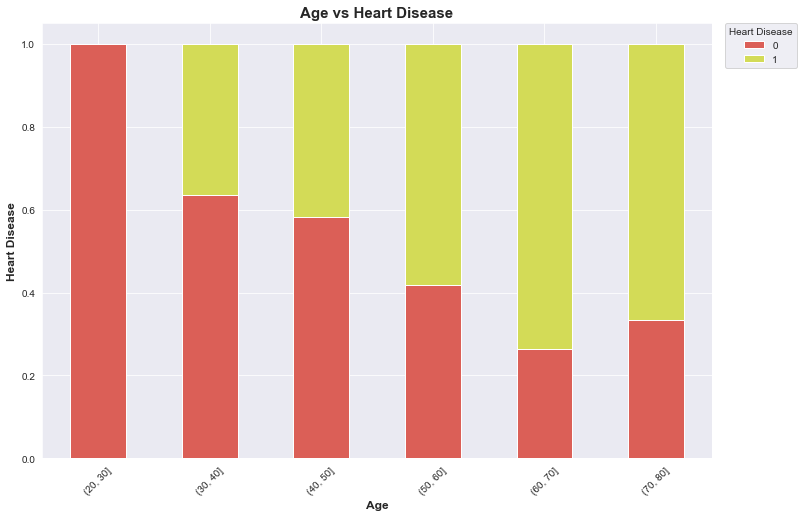

In [12]:
#investigating relationship between age and heart disease

bins = [20, 30, 40, 50, 60, 70, 80]

heart.age_heart = pd.cut(heart['Age'], bins)
Age = pd.crosstab(heart.age_heart, heart.HeartDisease)
Age.div(Age.sum(1).astype(float),axis=0). plot(kind='bar', stacked=True)

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad= 0, title='Heart Disease')
plt.xlabel('Age', fontweight='bold',fontsize=12)
plt.ylabel('Heart Disease', fontweight='bold',fontsize=12)
plt.title('Age vs Heart Disease',fontweight='bold', fontsize=15);

##### Insights:
- The older you get the higher the risk of having an heart failure.
- People in age range 60-70 have the highest risk of getting an heart failure.
- The age distribution in the dataset is left skewed i.e most of the patients above 50.

#### Resting BP

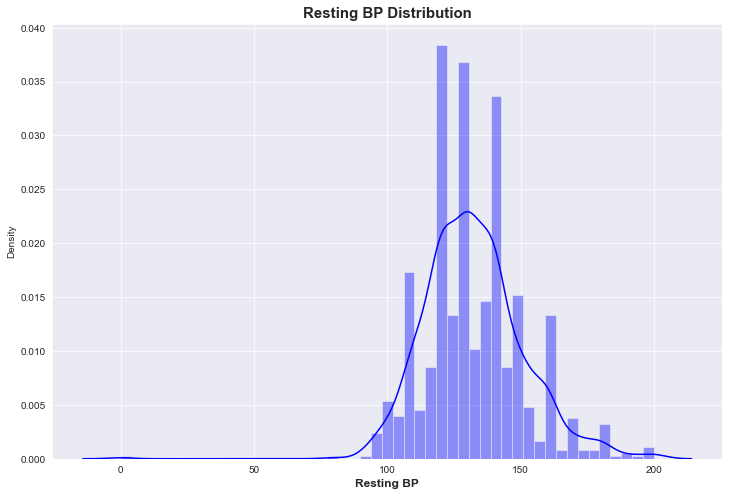

In [13]:
#check the distribution of the resting blood pressure

sns.distplot(heart.RestingBP, kde=True, color = 'blue')
plt.title('Resting BP Distribution',fontweight='bold', fontsize=15)
plt.xlabel('Resting BP',fontweight='bold',fontsize=12);

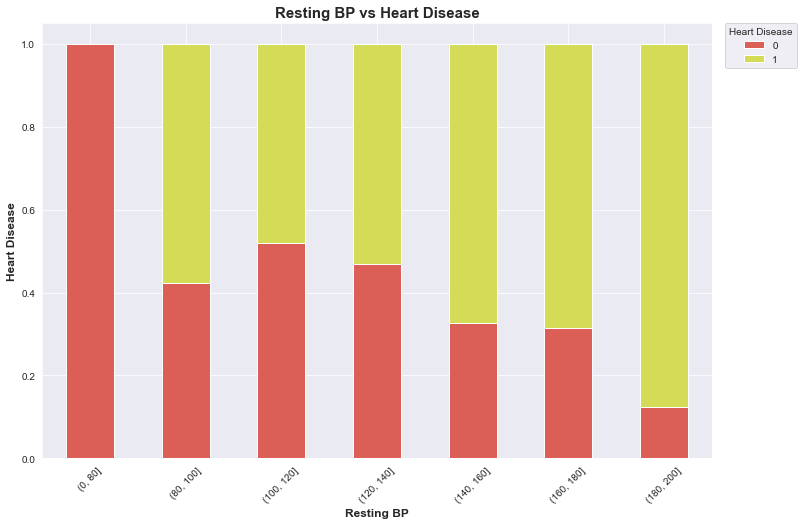

In [14]:
#investigating relationship between resting bp and heart disease

bins = [0, 80, 100, 120, 140, 160, 180, 200, 220]

heart.bp_heart = pd.cut(heart['RestingBP'], bins)
BP = pd.crosstab(heart.bp_heart, heart.HeartDisease)
BP.div(BP.sum(1).astype(float),axis=0). plot(kind='bar', stacked=True)

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad= 0, title='Heart Disease')
plt.xlabel('Resting BP', fontweight='bold',fontsize=12)
plt.ylabel('Heart Disease', fontweight='bold',fontsize=12)
plt.title('Resting BP vs Heart Disease',fontweight='bold', fontsize=15);

##### Insights:
- People that have higher resting blood sugar tend to have heart failure.
- People with resting blood pressure in the range 180-200 experience heart failure the most.

#### Cholesterol

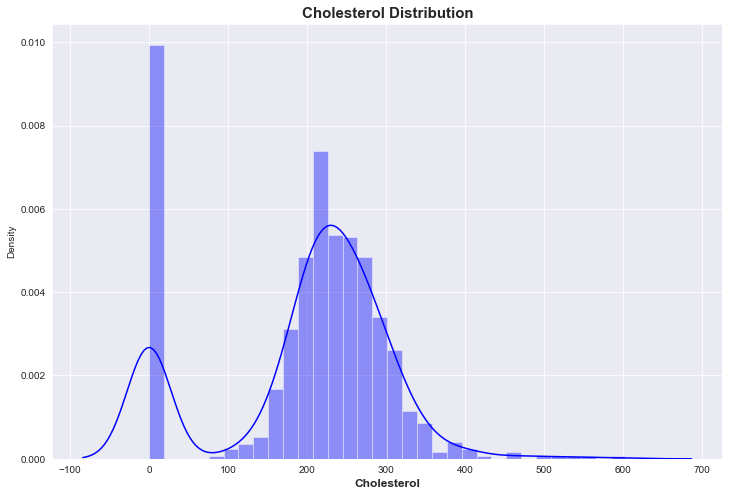

In [15]:
#check the distribution of cholesterol

sns.distplot(heart.Cholesterol, kde=True, color = 'blue')
plt.title('Cholesterol Distribution',fontweight='bold', fontsize=15)
plt.xlabel('Cholesterol',fontweight='bold',fontsize=12);

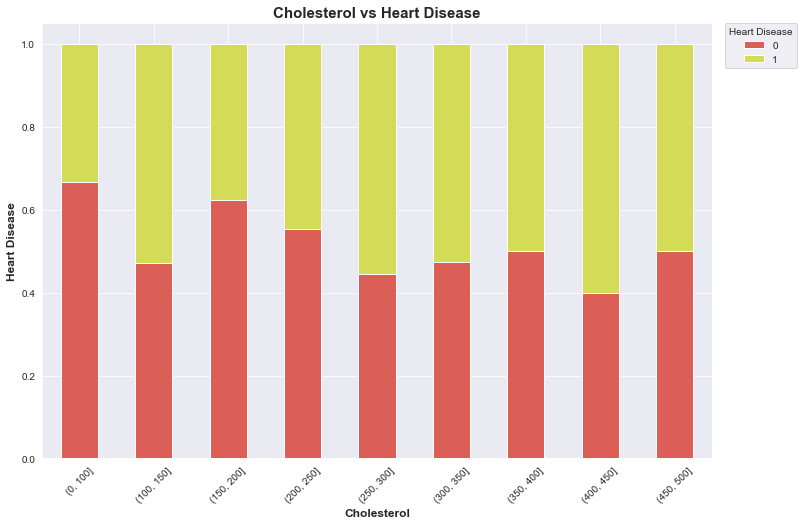

In [16]:
#investigating relationship between cholesterol and heart disease

bins = [0, 100, 150, 200, 250, 300, 350, 400, 450, 500]

heart.chol_heart = pd.cut(heart['Cholesterol'], bins)
chol = pd.crosstab(heart.chol_heart, heart.HeartDisease)
chol.div(chol.sum(1).astype(float),axis=0). plot(kind='bar', stacked=True)


plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad= 0, title='Heart Disease')
plt.xlabel('Cholesterol', fontweight='bold',fontsize=12)
plt.ylabel('Heart Disease', fontweight='bold',fontsize=12)
plt.title('Cholesterol vs Heart Disease',fontweight='bold', fontsize=15);

##### Insights:
- Cholesterol has a bimodal data distribution.
- From the chart above, we cannot conclude if the cholesterol level have anything to do with heart failure.

#### Fasting BS

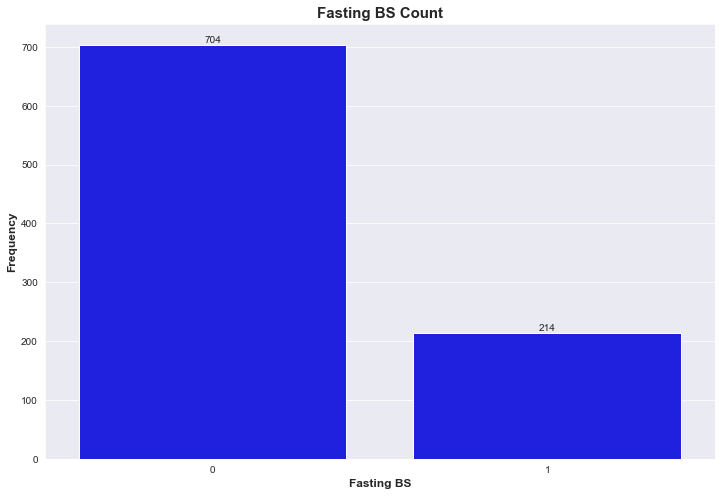

In [17]:
#count plot to visualize fasting bs

fb = sns.countplot(x='FastingBS', data=heart, color='blue', order= heart['FastingBS'].value_counts().index)

plt.xlabel('Fasting BS',fontweight='bold',fontsize=12)
plt.ylabel('Frequency',fontweight='bold',fontsize=12)
plt.title('Fasting BS Count', fontweight='bold',fontsize=15);

for i in fb.containers:
    fb.bar_label(i)

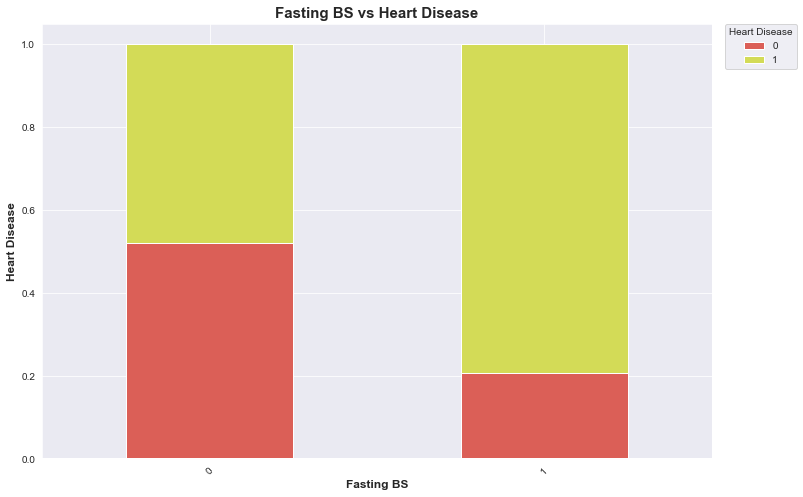

In [18]:
#investigating relationship between fasting blood sugar and heart disease

fast = pd.crosstab(heart.FastingBS, heart.HeartDisease)
fast.div(fast.sum(1).astype(float),axis=0). plot(kind='bar', stacked=True)

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad= 0, title='Heart Disease')
plt.xlabel('Fasting BS', fontweight='bold',fontsize=12)
plt.ylabel('Heart Disease', fontweight='bold',fontsize=12)
plt.title('Fasting BS vs Heart Disease',fontweight='bold', fontsize=15);

##### Insights:
- Most people have fasting blood sugar of 0 i.e their fasting blood suagr is less than 120mg/dl.
- People with fasting blood suagr of more than 120mg/dl tend to experience heart failure more than those whose fasting blood sugar is lower.

#### Max HR

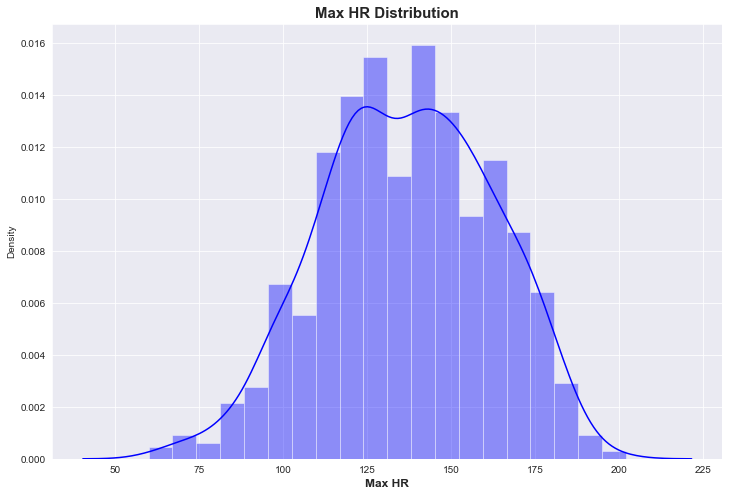

In [19]:
#check the distribution of max hr

sns.distplot(heart.MaxHR, kde=True, color = 'blue')
plt.title('Max HR Distribution',fontweight='bold', fontsize=15)
plt.xlabel('Max HR',fontweight='bold',fontsize=12);

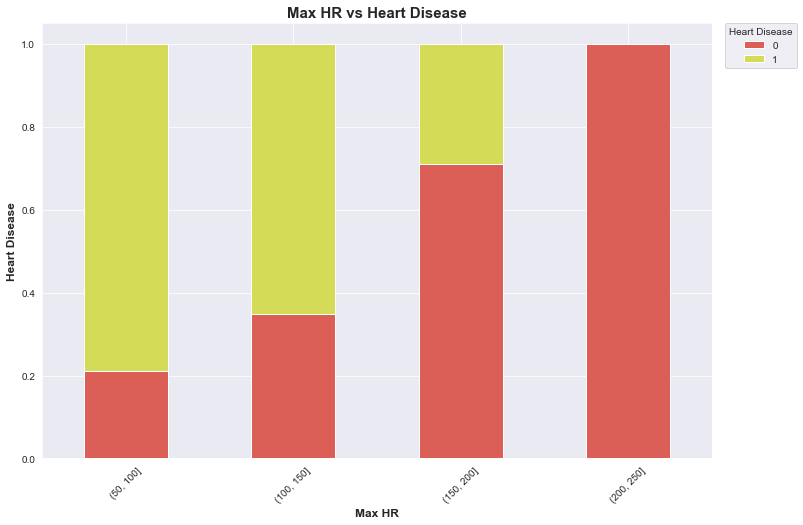

In [20]:
#investigating relationship between max hr and heart disease

bins = [50, 100, 150, 200, 250]

heart.max_heart = pd.cut(heart['MaxHR'], bins)
maxh = pd.crosstab(heart.max_heart, heart.HeartDisease)
maxh.div(maxh.sum(1).astype(float),axis=0). plot(kind='bar', stacked=True)

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad= 0, title='Heart Disease')
plt.xlabel('Max HR', fontweight='bold',fontsize=12)
plt.ylabel('Heart Disease', fontweight='bold',fontsize=12)
plt.title('Max HR vs Heart Disease',fontweight='bold', fontsize=15);

##### Insights:
- A lower maximum heart rate puts one at the risk of heart failure.
- People with maximum heart rate of 50-100 have higher chance of having heart failure.

#### Old Peak

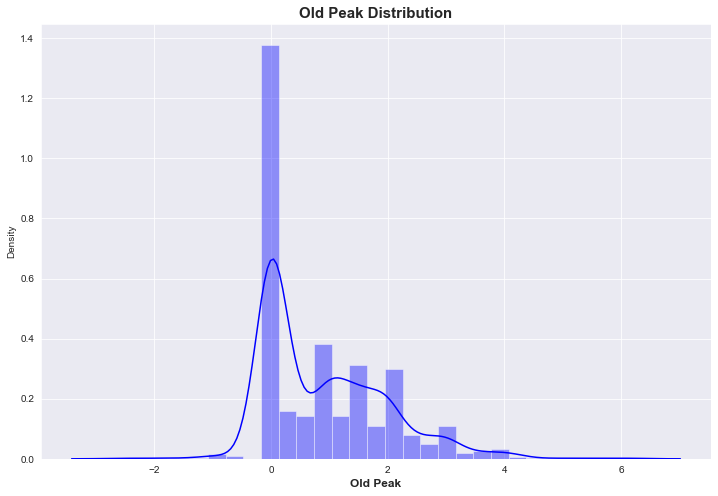

In [21]:
#check the distribution of old peak

sns.distplot(heart.Oldpeak, kde=True, color = 'blue')
plt.title('Old Peak Distribution',fontweight='bold', fontsize=15)
plt.xlabel('Old Peak',fontweight='bold',fontsize=12);

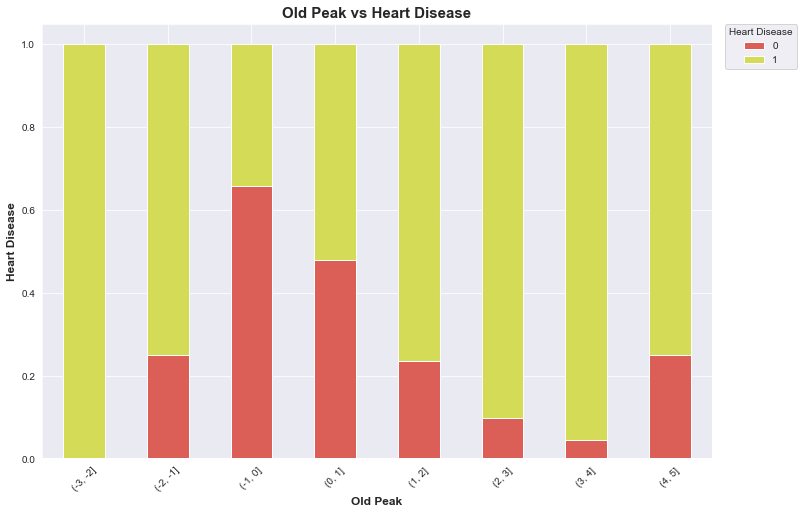

In [22]:
#investigating relationship between old peak and heart disease

bins = [-3, -2, -1, 0, 1, 2, 3, 4, 5]

heart.old_heart = pd.cut(heart['Oldpeak'], bins)
old = pd.crosstab(heart.old_heart, heart.HeartDisease)
old.div(old.sum(1).astype(float),axis=0). plot(kind='bar', stacked=True)

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad= 0, title='Heart Disease')
plt.xlabel('Old Peak', fontweight='bold',fontsize=12)
plt.ylabel('Heart Disease', fontweight='bold',fontsize=12)
plt.title('Old Peak vs Heart Disease',fontweight='bold', fontsize=15);

##### Insights:
- The distribution is rightly skewed.
- People whose depression level fall under range -3 to -2 have 100% chance of experiencing heart failure.

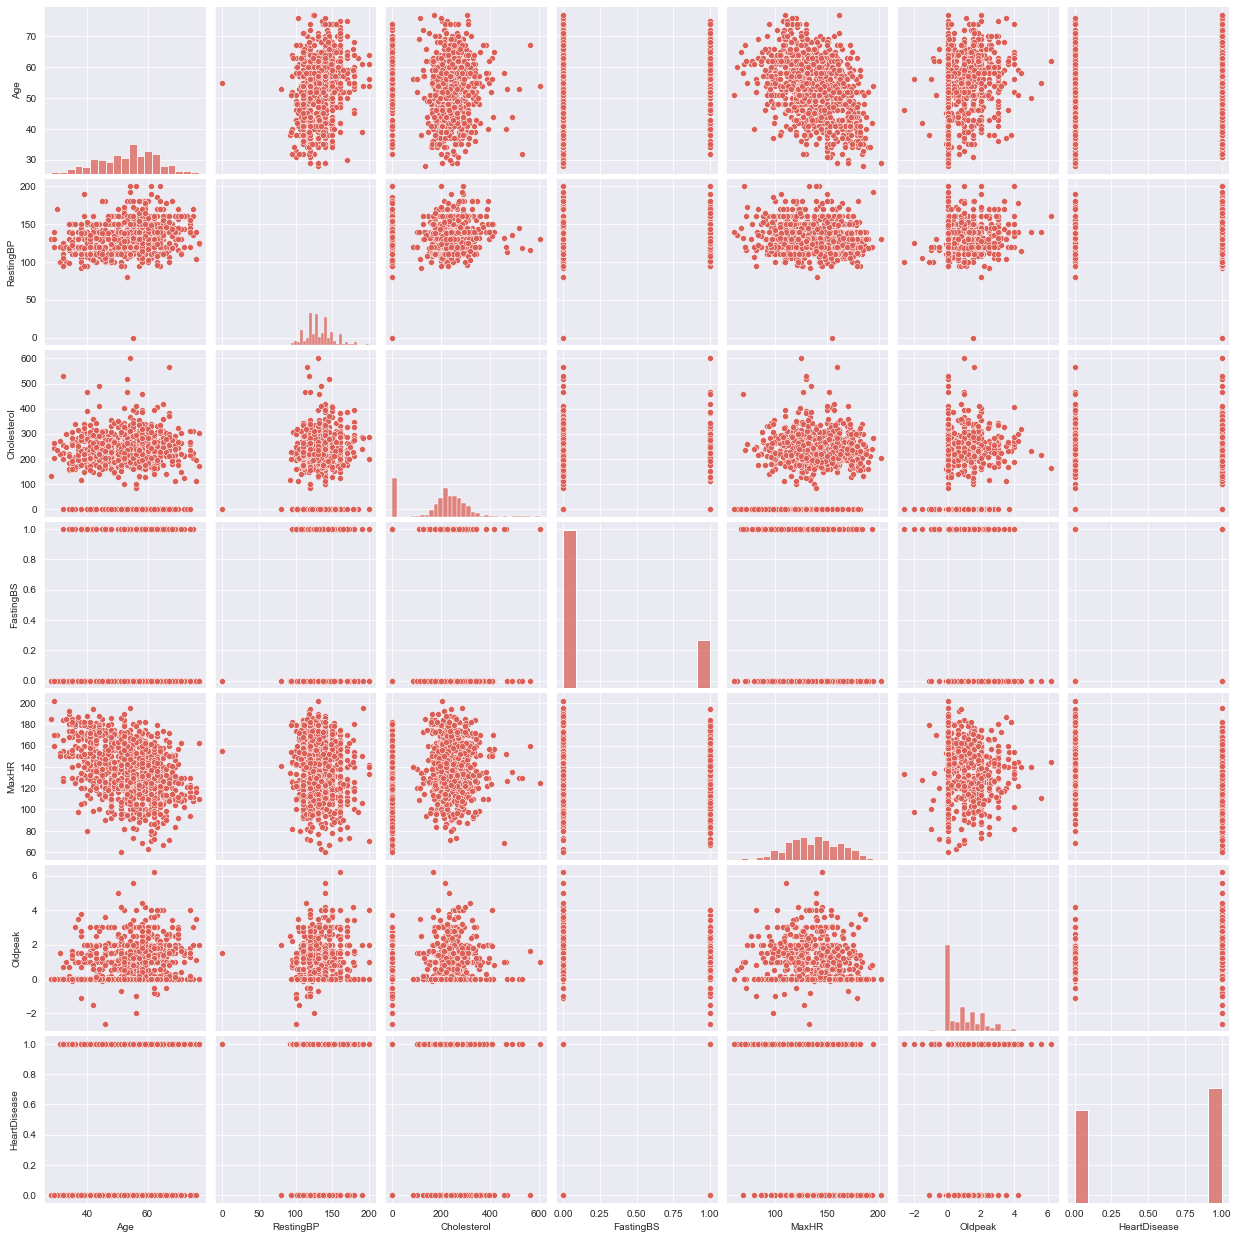

In [23]:
#create a pairplot to visualize relationship between the dependent and independent variables
sns.pairplot(heart);

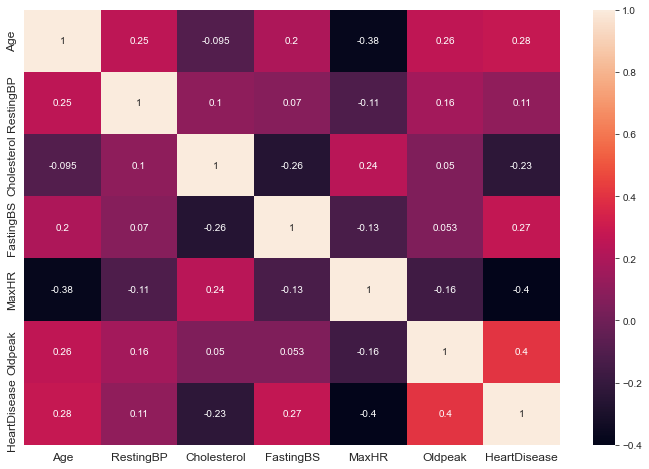

In [24]:
pred_cor = heart.corr()
sns.heatmap(pred_cor, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Insights:
- From the pairplot, there is no linear relationship between the dependent variable and the independent variables.
- Varaibles age, resting bp, fasting bs and old peak have very low positive correlation with heart disease.
- Variables cholesterol and max hr have very low negative correlation with heart disease.

#### 2. EDA on Categorical Columns

In [25]:
#function to extract categorical columns from the dataset
categorical = []
for col in heart:
    if heart[col].dtype =='object':
        categorical.append(col)
        
#print the categorical columns
print('The categorical columns are :', categorical)

The categorical columns are : ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [26]:
#checking the number of unique values in each of the categorical columns

h_place = {}
for i in list(categorical):
    h_place[i] = heart[i].value_counts().shape[0]

pd.DataFrame(h_place, index=['Unique Values'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
Unique Values,2,4,3,2,3


#### Sex

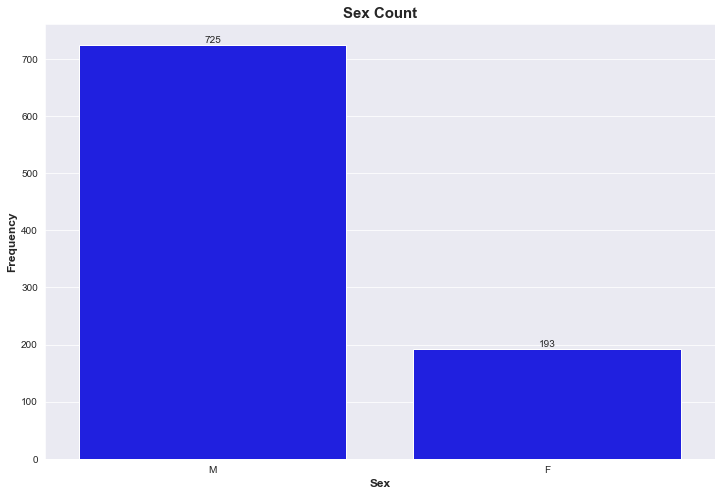

In [27]:
#count plot to visualize sex

sx = sns.countplot(x='Sex', data=heart, color='blue', order= heart['Sex'].value_counts().index)
plt.xlabel('Sex',fontweight='bold',fontsize=12)
plt.ylabel('Frequency',fontweight='bold',fontsize=12)
plt.title('Sex Count', fontweight='bold',fontsize=15);

for i in sx.containers:
    sx.bar_label(i)

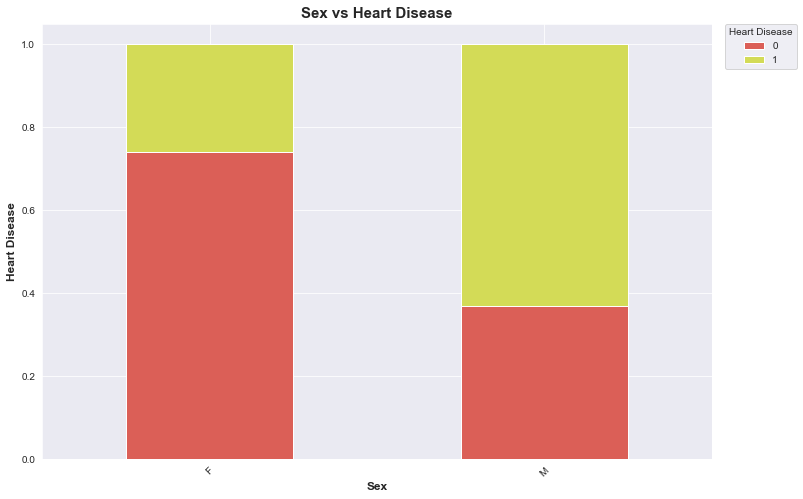

In [28]:
#investigating relationship between sex and heart disease

sex = pd.crosstab(heart.Sex, heart.HeartDisease)
sex.div(sex.sum(1).astype(float),axis=0). plot(kind='bar', stacked=True)

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad= 0, title='Heart Disease')
plt.xlabel('Sex', fontweight='bold',fontsize=12)
plt.ylabel('Heart Disease', fontweight='bold',fontsize=12)
plt.title('Sex vs Heart Disease',fontweight='bold', fontsize=15);

##### Insight:
- Males are more prone to heart failure than females.

#### Chest Pain Type

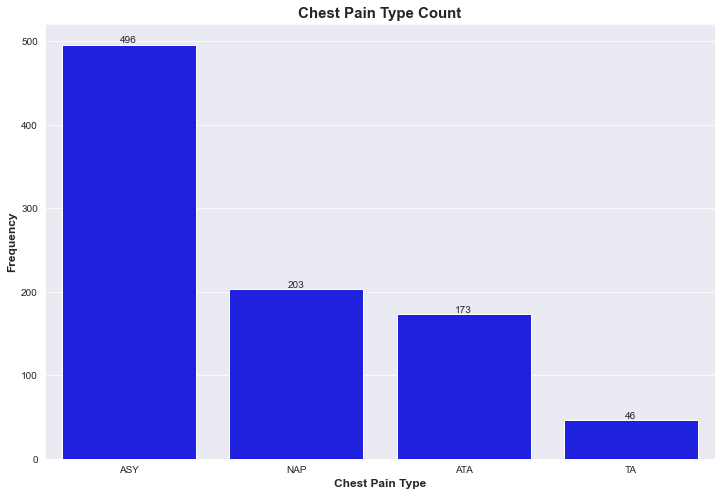

In [29]:
#count plot to visualize chest pain type

cp = sns.countplot(x='ChestPainType', data=heart, color='blue', order= heart['ChestPainType'].value_counts().index)
plt.xlabel('Chest Pain Type',fontweight='bold',fontsize=12)
plt.ylabel('Frequency',fontweight='bold',fontsize=12)
plt.title('Chest Pain Type Count', fontweight='bold',fontsize=15);

for i in cp.containers:
    cp.bar_label(i)

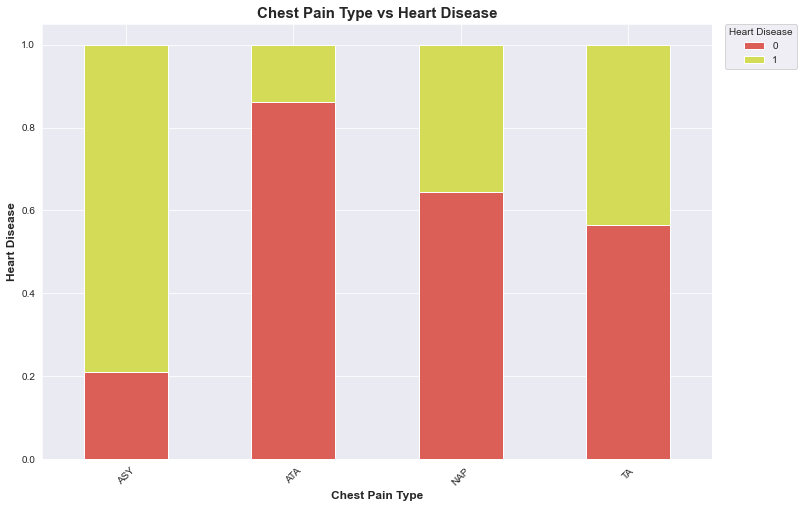

In [30]:
#investigating relationship between chest pain type and heart disease

chest = pd.crosstab(heart.ChestPainType, heart.HeartDisease)
chest.div(chest.sum(1).astype(float),axis=0). plot(kind='bar', stacked=True)

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad= 0, title='Heart Disease')
plt.xlabel('Chest Pain Type', fontweight='bold',fontsize=12)
plt.ylabel('Heart Disease', fontweight='bold',fontsize=12)
plt.title('Chest Pain Type vs Heart Disease',fontweight='bold', fontsize=15);

#### Insight:
- Asymptomatic chest pain type is the most common chest pain type and people with it have a higher chance of experiencing heart failure, while peolpe with Atypical Angina have very low chance of experiencing heart failure.

#### Resting ECG

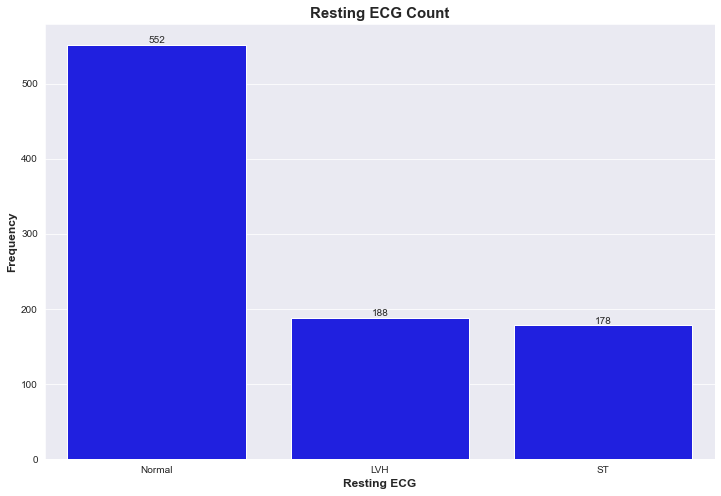

In [31]:
#count plot to visualize resting ecg

ecg = sns.countplot(x='RestingECG', data=heart, color='blue', order= heart['RestingECG'].value_counts().index)
plt.xlabel('Resting ECG',fontweight='bold',fontsize=12)
plt.ylabel('Frequency',fontweight='bold',fontsize=12)
plt.title('Resting ECG Count', fontweight='bold',fontsize=15);

for i in ecg.containers:
    ecg.bar_label(i)

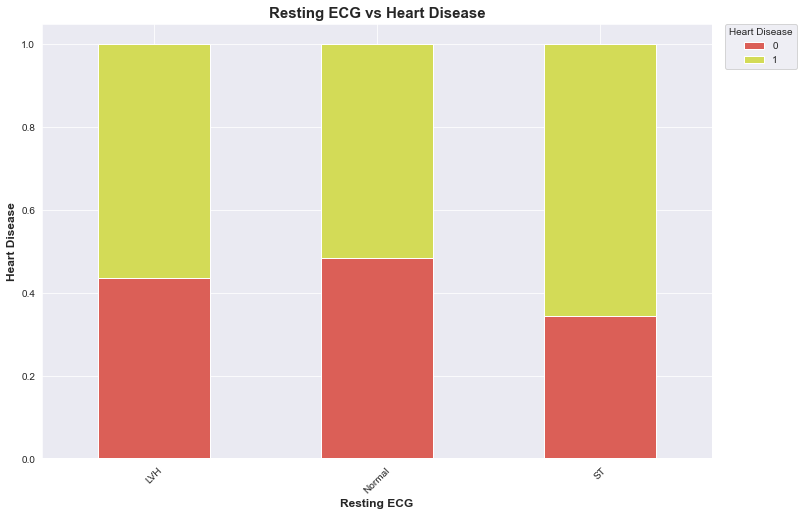

In [32]:
#investigating relationship between resting ecg and heart disease

rest = pd.crosstab(heart.RestingECG, heart.HeartDisease)
rest.div(rest.sum(1).astype(float),axis=0). plot(kind='bar', stacked=True)

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad= 0, title='Heart Disease')
plt.xlabel('Resting ECG', fontweight='bold',fontsize=12)
plt.ylabel('Heart Disease', fontweight='bold',fontsize=12)
plt.title('Resting ECG vs Heart Disease',fontweight='bold', fontsize=15);

##### Insights:
- Normal resting ecg is the most common resting ecg.
- There is no much difference between the resting ecg types and how much they are prone to experiencing heart failure.

#### Exercise Angina

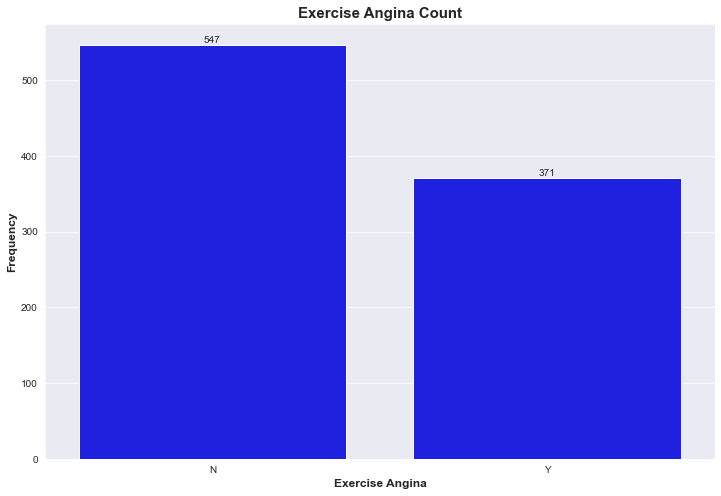

In [33]:
#count plot to visualize exercise angina

an = sns.countplot(x='ExerciseAngina', data=heart, color='blue', order= heart['ExerciseAngina'].value_counts().index)
plt.xlabel('Exercise Angina',fontweight='bold',fontsize=12)
plt.ylabel('Frequency',fontweight='bold',fontsize=12)
plt.title('Exercise Angina Count', fontweight='bold',fontsize=15);

for i in an.containers:
    an.bar_label(i)

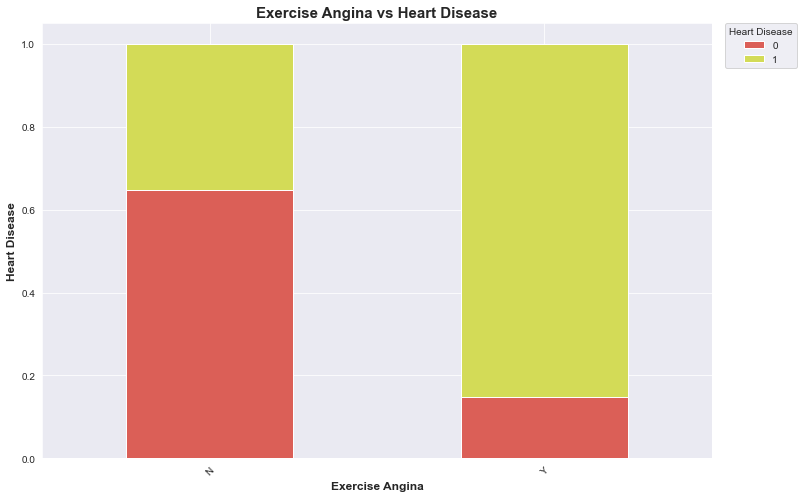

In [34]:
#investigating relationship between exercise angina and heart disease

exer = pd.crosstab(heart.ExerciseAngina, heart.HeartDisease)
exer.div(exer.sum(1).astype(float),axis=0). plot(kind='bar', stacked=True)

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad= 0, title='Heart Disease')
plt.xlabel('Exercise Angina', fontweight='bold',fontsize=12)
plt.ylabel('Heart Disease', fontweight='bold',fontsize=12)
plt.title('Exercise Angina vs Heart Disease',fontweight='bold', fontsize=15);

##### Insights:
- People without exercise induced angina are more than those with it.
- People with exercide induced angina experienced heart failure more than those without it.

#### ST Slope

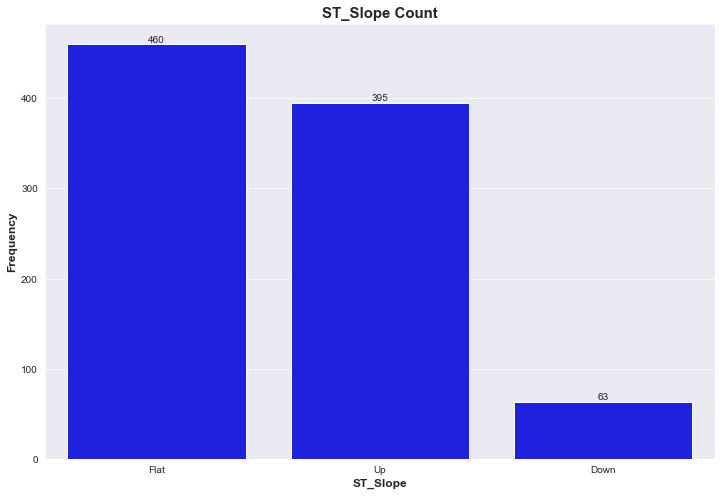

In [35]:
#count plot to visualize st slope

st = sns.countplot(x='ST_Slope', data=heart, color='blue', order= heart['ST_Slope'].value_counts().index)
plt.xlabel('ST_Slope',fontweight='bold',fontsize=12)
plt.ylabel('Frequency',fontweight='bold',fontsize=12)
plt.title('ST_Slope Count', fontweight='bold',fontsize=15);

for i in st.containers:
    st.bar_label(i)

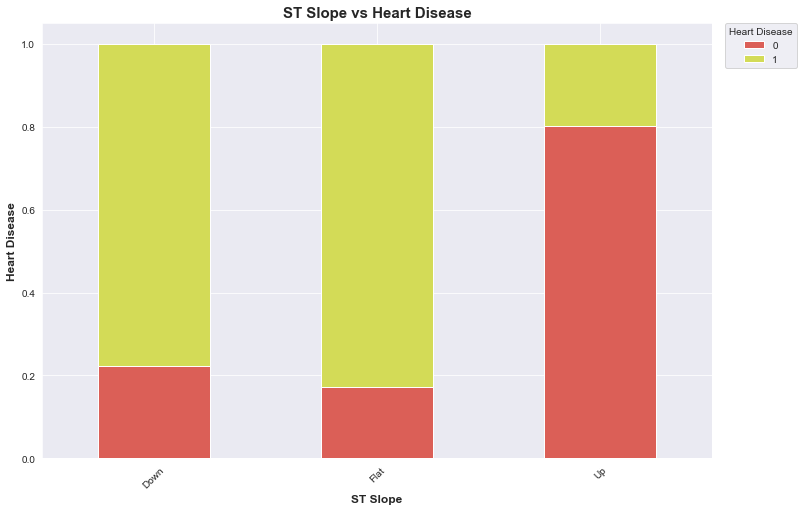

In [36]:
#investigating relationship between st_slope and heart disease

slope = pd.crosstab(heart.ST_Slope, heart.HeartDisease)
slope.div(slope.sum(1).astype(float),axis=0). plot(kind='bar', stacked=True)

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad= 0, title='Heart Disease')
plt.xlabel('ST Slope', fontweight='bold',fontsize=12)
plt.ylabel('Heart Disease', fontweight='bold',fontsize=12)
plt.title('ST Slope vs Heart Disease',fontweight='bold', fontsize=15);

##### Insights:
- Most people have flat st slope.
- Peolpe with down st slope have high probability of being diagnosed with heart failure.

#### 3. EDA on Target Variable (Heart Disease)

In [37]:
#value count of heart disease

heart.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

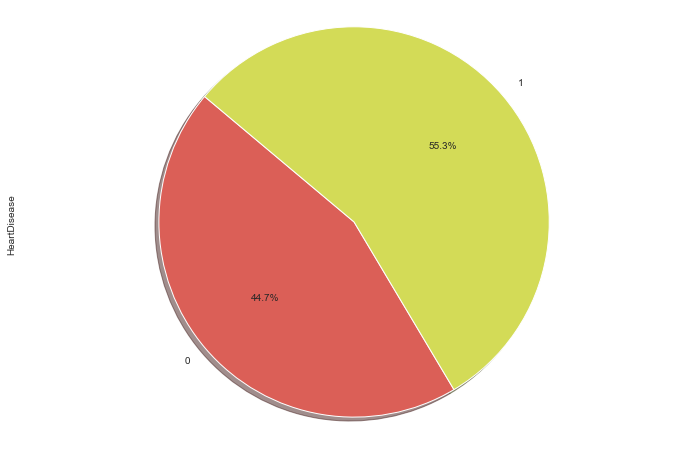

In [38]:
h_d = heart.groupby('HeartDisease')['HeartDisease'].count()

labels = '0', '1'

h_d.plot.pie(y=h_d.values ,labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show();

#### Insight:
- The dataset is almost evenly balanced.
- 56.3% of people have heart failure.

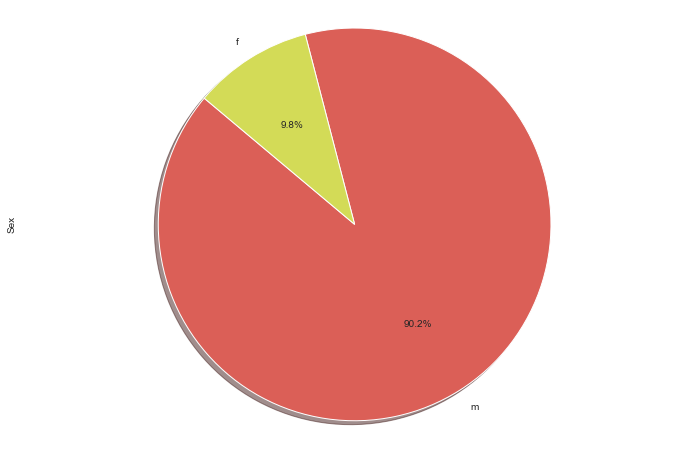

In [39]:
h = heart[heart['HeartDisease']==1]['Sex'].value_counts()

labels = 'm', 'f'

h.plot.pie(y=h.values ,labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show();

#### Detecting Outliers

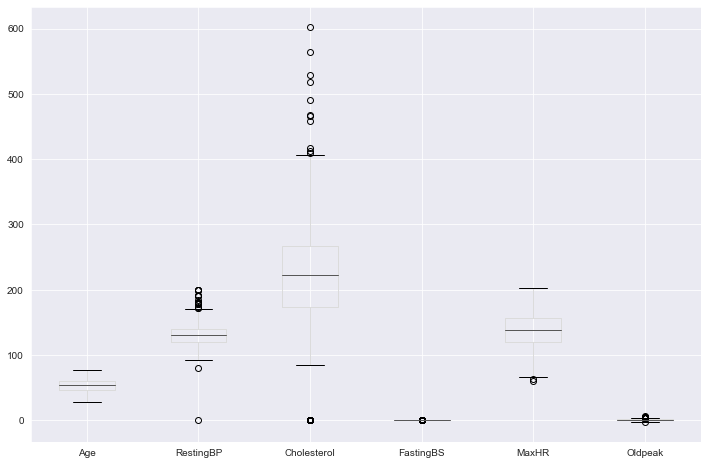

In [40]:
#using boxplot to detect ouliers in the numerical colum

heart.boxplot(numerical);

##### Insights:
- There is presence of outliers in the cholesterol and resting bp columns, but I won't be removing them. 
- I won'b be reoving the outliers because the respondents might have some health conditions that made their feature different from the data of the other respondents, since I can't really tell why we have those outliers I will work with them.

#### Model Building for Heart Failure Prediction

##### For this prediction, 3 models will be used:
- Logistic Regression
- SVM
- Decision Tree Classifier

#### Data Preparation

In [41]:
#split data into target and feature

X = heart.drop(['HeartDisease'], axis =1)
y= heart['HeartDisease']

In [42]:
#split into test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [43]:
#check the shape of our split 

X_train.shape, X_test.shape

((734, 11), (184, 11))

In [62]:
y_train.shape, y_test.shape

((734,), (184,))

#### Feature Engineering

In [44]:
#encoding categorical data (I will only encode sex and exercise angina because they have only two unique categories) 

encoder =ce.BinaryEncoder(cols=['Sex', 'ExerciseAngina'])
X_train= encoder.fit_transform(X_train)
X_test= encoder.fit_transform(X_test)

In [45]:
#get dummies for the other categorical data
#concat the dummy column to the train dataset

X_train = pd.concat([X_train[numerical], X_train[['Sex_0', 'Sex_1', 'ExerciseAngina_0', 'ExerciseAngina_1']], 
                    pd.get_dummies(X_train.ChestPainType), 
                    pd.get_dummies(X_train.RestingECG), 
                    pd.get_dummies(X_train.ST_Slope)], 
                   axis =1)

In [46]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ExerciseAngina_0,ExerciseAngina_1,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
378,70,140,0,1,157,2.0,0,1,0,1,1,0,0,0,0,1,0,0,1,0
356,46,115,0,0,113,1.5,0,1,0,1,1,0,0,0,0,1,0,0,1,0
738,65,160,360,0,151,0.8,1,0,1,0,0,0,1,0,1,0,0,0,0,1
85,66,140,139,0,94,1.0,0,1,0,1,1,0,0,0,0,1,0,0,1,0
427,59,140,0,0,117,1.0,0,1,0,1,1,0,0,0,0,0,1,0,1,0


In [47]:
#get dummies for the other categorical data
#concat the dummy column to the test dataset

X_test = pd.concat([X_test[numerical], X_test[['Sex_0', 'Sex_1', 'ExerciseAngina_0', 'ExerciseAngina_1']], 
                    pd.get_dummies(X_test.ChestPainType), 
                    pd.get_dummies(X_test.RestingECG), 
                    pd.get_dummies(X_test.ST_Slope)], 
                   axis =1)

In [48]:
X_test.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ExerciseAngina_0,ExerciseAngina_1,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
306,55,115,0,1,155,0.1,0,1,0,1,1,0,0,0,0,1,0,0,1,0
711,66,120,302,0,151,0.4,0,1,0,1,1,0,0,0,1,0,0,0,1,0
298,51,110,0,1,92,0.0,0,1,0,1,1,0,0,0,0,1,0,0,1,0
466,55,120,0,0,125,2.5,0,1,1,0,0,0,1,0,0,0,1,0,1,0
253,62,140,271,0,152,1.0,0,1,0,1,0,1,0,0,0,1,0,0,0,1


In [49]:
#putting column names in a variable cols, since column name will be lost after scaling

cols = X_train.columns

#### Feature Scaling

In [50]:
scaler= MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [51]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ExerciseAngina_0,ExerciseAngina_1,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,0.857143,0.700,0.000000,1.0,0.676259,0.522727,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.367347,0.575,0.000000,0.0,0.359712,0.465909,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.755102,0.800,0.597015,0.0,0.633094,0.386364,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.775510,0.700,0.230514,0.0,0.223022,0.409091,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.632653,0.700,0.000000,0.0,0.388489,0.409091,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [52]:
X_test = pd.DataFrame(X_test, columns=[cols])
X_test.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ExerciseAngina_0,ExerciseAngina_1,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,0.531915,0.190476,0.000000,1.0,0.708955,0.328125,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.765957,0.238095,0.583012,0.0,0.679104,0.375000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.446809,0.142857,0.000000,1.0,0.238806,0.312500,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.531915,0.238095,0.000000,0.0,0.485075,0.703125,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.680851,0.428571,0.523166,0.0,0.686567,0.468750,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#### Model Training

#### 1. Logistic Regression

In [53]:
logreg = LogisticRegression()

In [54]:
#model fitting

logreg.fit(X_train, y_train)

LogisticRegression()

In [55]:
#making predictions

y_pred = logreg.predict(X_test)

#### Model Evaluation for Logistic Regression

In [56]:
#check for accuracy

print ('Accuracy of logistic regression classifier:{:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier:0.80


In [57]:
#using confusion matrix

cm = confusion_matrix (y_test, y_pred)
print(cm)

[[55 22]
 [15 92]]


This result is telling us that we have 147 correct predictions and 37 incorrect predictions.

In [58]:
#using classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        77
           1       0.81      0.86      0.83       107

    accuracy                           0.80       184
   macro avg       0.80      0.79      0.79       184
weighted avg       0.80      0.80      0.80       184



This result is telling us the following:
- Using the recall column: If the model predicts no, there is a 71% chance that the actual label is no and if it predicts yes, there is a 86% chance that the actual label is yes.
- Using the precision label: Out of all the people that the model predicted would have heart failure only 81% actually did,and out of all the people that the model predicted would not have heart failure 79% actually did not.
- Using the f1 score: Since this value is close to 1, the model did a good job predicting whether or not a person will experience heart failure or not.
- Support: 77 people did not have heart failure, 107 did.

In [68]:
#using area under the curve

#use model to predict probability that given y value is 1
y_pred1 = logreg.predict_proba(X_test)[::,1]

In [66]:
#plot ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

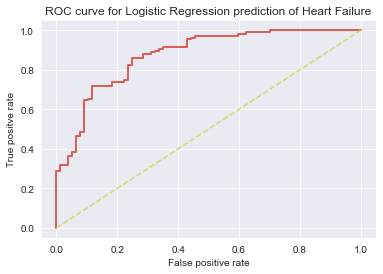

In [67]:
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC curve for Logistic Regression prediction of Heart Failure')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()

In [69]:
#calculate AUC  of the model
auc = metrics.roc_auc_score(y_test, y_pred1)

#print auc score
print(auc)

0.8746207063964073


Since our area under the curve is close to 1, the model is very good.

#### 2. Support Vector Machine Model

#### Data Preparation

In [75]:
#split data into target and feature

X = heart.drop(['HeartDisease'], axis =1)
y= heart['HeartDisease']

In [76]:
#split into test and train data


X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state= 0)

In [77]:
#encoding categorocal data 

encoder =ce.BinaryEncoder(cols=['Sex', 'ExerciseAngina'])
X_train2= encoder.fit_transform(X_train2)
X_test2= encoder.fit_transform(X_test2)

In [78]:
X_train2 = pd.concat([X_train2[numerical], X_train2[['Sex_0', 'Sex_1', 'ExerciseAngina_0', 'ExerciseAngina_1']], 
                    pd.get_dummies(X_train2.ChestPainType), 
                    pd.get_dummies(X_train2.RestingECG), 
                    pd.get_dummies(X_train2.ST_Slope)], 
                   axis =1)

In [79]:
X_test2 = pd.concat([X_test2[numerical], X_test2[['Sex_0', 'Sex_1', 'ExerciseAngina_0', 'ExerciseAngina_1']], 
                    pd.get_dummies(X_test2.ChestPainType), 
                    pd.get_dummies(X_test2.RestingECG), 
                    pd.get_dummies(X_test2.ST_Slope)], 
                   axis =1)

In [80]:
cols = X_train2.columns

#### Feature Scaling

In [81]:
sc = StandardScaler()
sc.fit(X_train2)
X_train_std = sc.transform(X_train2)
X_test_std = sc.transform(X_test2)

#### Model Training

In [82]:
#incoporate the SVC(Support Vector Classifier)

svc = SVC(C=1.0, random_state=0, kernel='linear', probability=True)

In [83]:
#fit the model

svc.fit(X_train_std, y_train2)

SVC(kernel='linear', probability=True, random_state=0)

In [84]:
#making predictions

y_predict = svc.predict(X_test_std)

#### Model Evaluation for SVM

In [85]:
print ('Accuracy of svm model:{:.2f}'.format(svc.score(X_test_std, y_test2)))

Accuracy of svm model:0.80


In [86]:
#using confusion matrix

cm = confusion_matrix (y_test2, y_predict)
print(cm)

[[55 22]
 [14 93]]


This result is telling us that we have 148 correct predictions and 36 incorrect predictions.

In [72]:
#using classification report

print(classification_report(y_test2, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        77
           1       0.81      0.87      0.84       107

    accuracy                           0.80       184
   macro avg       0.80      0.79      0.80       184
weighted avg       0.80      0.80      0.80       184



This result is telling us the following:
- Using the recall column: If the model predicts no, there is a 71% chance that the actual label is no and if it predicts yes, there is a 87% chance that the actual label is yes.
- Using the precision label: Out of all the people that the model predicted would have heart failure only 81% actually did, and out of all the people that the model predicted would not have heart failure 80% actually did not.
- Using the f1 score: Since this value is close to 1, the model did a good job predicting whether or not a person will experience heart failure or not.
- Support: 77 people did not have heart failure, 107 did.

In [87]:
#using area under the curve

#use model to predict probability that given y value is 1
y_predict1 = svc.predict_proba(X_test_std)[::,1]

In [88]:
#plot ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test2, y_predict1)

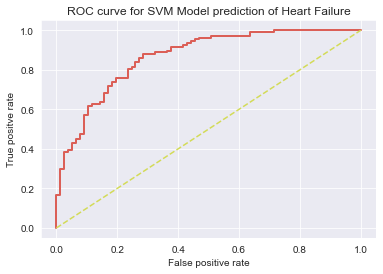

In [89]:
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC curve for SVM Model prediction of Heart Failure')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()

In [90]:

#calculate AUC  of the model
auc2 = metrics.roc_auc_score(y_test2, y_predict1)

#print auc score
print(auc)

0.8746207063964073


Since our area under the curve is close to 1, the model is very good.

#### 3. Decision Tree Classification Model

In [93]:
#split data into target and feature

X = heart.drop(['HeartDisease'], axis =1)
y= heart['HeartDisease']

In [94]:
#split into test and train data

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state= 0)

In [95]:
#encoding categorocal data 

encoder =ce.BinaryEncoder(cols=['Sex', 'ExerciseAngina'])
X_train3= encoder.fit_transform(X_train3)
X_test3= encoder.fit_transform(X_test3)

In [96]:
X_train3 = pd.concat([X_train3[numerical], X_train3[['Sex_0', 'Sex_1', 'ExerciseAngina_0', 'ExerciseAngina_1']], 
                    pd.get_dummies(X_train3.ChestPainType), 
                    pd.get_dummies(X_train3.RestingECG), 
                    pd.get_dummies(X_train3.ST_Slope)], 
                   axis =1)

In [97]:
X_test3 = pd.concat([X_test3[numerical], X_test3[['Sex_0', 'Sex_1', 'ExerciseAngina_0', 'ExerciseAngina_1']], 
                    pd.get_dummies(X_test3.ChestPainType), 
                    pd.get_dummies(X_test3.RestingECG), 
                    pd.get_dummies(X_test3.ST_Slope)], 
                   axis =1)

In [98]:
cols = X_train3.columns

#### Model Training

 There won't be any need to scale the features because decision trees do not require it as they are not sensitive to the variance in the data.

In [99]:
#create decision tree classifier object
dt = DecisionTreeClassifier()

#train decision tree classifier
dt = dt.fit(X_train3, y_train3)

#make predictions
y_prediction = dt.predict(X_test3)

#### Model Evaluation of the Decision Tree Classifier

In [100]:
#check for accuracy

print ('Accuracy of DT classifier:{:.2f}'.format(dt.score(X_test3, y_test3)))

Accuracy of DT classifier:0.73


In [101]:
#using confusion matrix

cm3 = confusion_matrix (y_test3, y_prediction)
print(cm3)

[[58 19]
 [30 77]]


This result is telling us that we have 136 correct predictions and 48 incorrect predictions.

In [102]:
#using classification report

print(classification_report(y_test3, y_prediction))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70        77
           1       0.80      0.72      0.76       107

    accuracy                           0.73       184
   macro avg       0.73      0.74      0.73       184
weighted avg       0.74      0.73      0.74       184



This result is telling us the following:
- Using the recall column: If the model predicts no, there is a 77% chance that the actual label is no and if it predicts yes, there is a 72% chance that the actual label is yes.
- Using the precision label: Out of all the people that the model predicted would have heart failure only 81% actually did, and out of all the people that the model predicted would not have heart failure 66% actually did not.
- Using the f1 score: Since this value is close to 1, the model did a good job predicting whether or not a person will experience heart failure or not.
- Support: 77 people did not have heart failure, 107 did.   

In [103]:
#using area under the curve

#use model to predict probability that given y value is 1
y_prediction1 = dt.predict_proba(X_test3)[::,1]

In [104]:
#plot ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test3, y_prediction1)

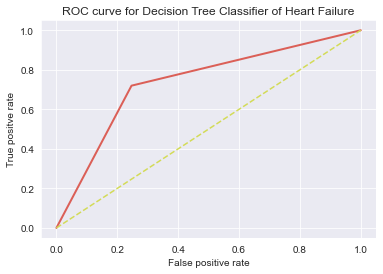

In [105]:
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC curve for Decision Tree Classifier of Heart Failure')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()

In [106]:
#calculate AUC  of the model
auc3 = metrics.roc_auc_score(y_test3, y_prediction1)

#print auc score
print(auc3)

0.7364364607355262


Since our area under the curve is close to 1, the model is very good.

#### Optimizing Decision Tree Classifier
Decision tree classifier was optimized using:
- Gini index
- Entropy

#### 3a. Optimizing decision tree performance using gini index as the criteria

In [108]:
#optimizing decision tree performance using gini index as the criteria

dt2 = DecisionTreeClassifier(criterion='gini')
dt2 = dt2.fit(X_train3, y_train3)
y_predictio = dt2.predict(X_test3)

#### Model Evaluation

In [109]:
#check for accuracy

print ('Accuracy of DT classifier:{:.2f}'.format(dt2.score(X_test3, y_test3)))

Accuracy of DT classifier:0.74


In [110]:
#using confusion matrix

cm4 = confusion_matrix (y_test3, y_predictio)
print(cm4)

[[60 17]
 [31 76]]


This result is telling us that we have 138 correct predictions and 46 incorrect predictions.

In [111]:
#using classification report

print(classification_report(y_test3, y_predictio))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71        77
           1       0.82      0.71      0.76       107

    accuracy                           0.74       184
   macro avg       0.74      0.74      0.74       184
weighted avg       0.75      0.74      0.74       184



This result is telling us the following:
- Using the recall column: If the model predicts no, there is a 77% chance that the actual label is no and if it predicts yes, there is a 74% chance that the actual label is yes.
- Using the precision label: Out of all the people that the model predicted would have heart failure only 81% actually did, and out of all the people that the model predicted would not have heart failure 68% actually did not.
- Using the f1 score: Since this value is close to 1, the model did a good job predicting whether or not a person will experience heart failure or not.
- Support: 77 people did not have heart failure, 107 did.   

In [112]:
#using area under the curve

#use model to predict probability that given y value is 1
y_predictio1 = dt2.predict_proba(X_test3)[::,1]

In [ ]:
#plot ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test3, y_predictio1)

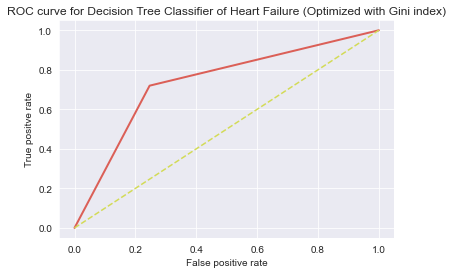

In [113]:
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC curve for Decision Tree Classifier of Heart Failure (Optimized with Gini index)')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()

In [114]:
#calculate AUC  of the model
auc4 = metrics.roc_auc_score(y_test3, y_predictio1)

#print auc score
print(auc4)

0.7447505765262775


Since our area under the curve is close to 1, the model is very good.

#### 3b. Optimizing decision tree performance using Entropy as the criteria

In [115]:
#optimizing decision tree performance using entropy as the criteria

dt3 = DecisionTreeClassifier(criterion='entropy')
dt3 = dt3.fit(X_train3, y_train3)
y_predicti = dt3.predict(X_test3)

#### Model Evaluation

In [116]:
#check for accuracy

print ('Accuracy of DT classifier:{:.2f}'.format(dt3.score(X_test3, y_test3)))

Accuracy of DT classifier:0.77


In [117]:
#using confusion matrix

cm5 = confusion_matrix (y_test3, y_predicti)
print(cm5)

[[58 19]
 [24 83]]


This result is telling us that we have 143 correct predictions and 41 incorrect predictions.

In [118]:
#using classification report

print(classification_report(y_test3, y_predicti))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        77
           1       0.81      0.78      0.79       107

    accuracy                           0.77       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.77      0.77      0.77       184



This result is telling us the following:
- Using the recall column: If the model predicts no, there is a 77% chance that the actual label is no and if it predicts yes, there is a 79% chance that the actual label is yes.
- Using the precision label: Out of all the people that the model predicted would have heart failure only 82% actually did, and out of all the people that the model predicted would not have heart failure 72% actually did not.
- Using the f1 score (weighted harmonic mean of precision and recall): Since this value is close to 1, the model did a good job predicting whether or not a person will experience heart failure or not.
- Support: 77 people did not have heart failure, 107 did.   

In [122]:
#using area under the curve

#use model to predict probability that given y value is 1
y_predicti1 = dt3.predict_proba(X_test3)[::,1]

In [124]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_predicti1)

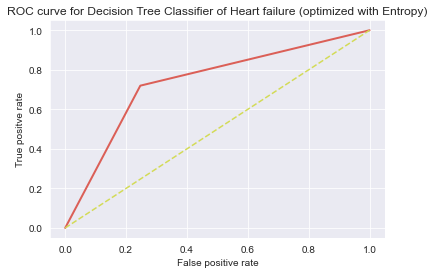

In [120]:
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC curve for Decision Tree Classifier of Heart failure (optimized with Entropy)')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()

In [125]:
#calculate AUC  of the model
auc5 = metrics.roc_auc_score(y_test3, y_predicti1)

#print auc score
print(auc5)

0.7644738439130963


Since our area under the curve is close to 1, the model is very good.

#### Conclusion

In [ ]:
conclusion = pd.read_csv('Conclusion.csv', index_col = 'Parameters')
conclusion

- The model is very good at detecting heart failure.
- Optimizing the decision tree classifier using entropy gave a better result.
- Judging with respect to the area under the curve, the logistic model gave the best result.